In [1]:
# the below code is used to make an interactive dashboard for sales prediction

# Sales Dashboard using Python
## Objective
* To perform Exploratory Data Analysis on the provided dataset 
* To showcase the findings as observed by the EDA
## Dataset Overview
* The Dateset comprises of 9800 rows and 18 columns 
## Data Cleaning
* many columns were irrelevant and superficial in a nutshell they were irrelevant
* The rows that included NA values were dropped in order to ensure that the NA values didnt distrupted the normal flow of things 
* In addition to the above steps many irrelevant information was also later filtered 
## Feature Engineering
* An entire new column called as `profit` was created assuming that the profit margin on every good was 25 % hence this column cannot be considered accurate as it is based on a pure assumption
## Visual Insights
* Various plots and graphs were made in order to ensure the data to be clearly and visually appealing way 
    
## Conclusion
* In conclusion this data set was used to make strategical decisions by showcasing the various results and finding the category as well as the subcategory that contributed the most to the profit 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
# setting up the graphs 

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(16,5)

# importing the dataset

df=pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

(None,
             Row ID   Postal Code         Sales
 count  9800.000000   9789.000000   9800.000000
 mean   4900.500000  55273.322403    230.769059
 std    2829.160653  32041.223413    626.651875
 min       1.000000   1040.000000      0.444000
 25%    2450.750000  23223.000000     17.248000
 50%    4900.500000  58103.000000     54.490000
 75%    7350.250000  90008.000000    210.605000
 max    9800.000000  99301.000000  22638.480000)

In [8]:
# df['Order Date']=pd.to_datetime(df['Order Date'])
# df['Ship Date']=pd.to_datetime(df['Ship Date'])
# a

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


In [9]:
df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)


In [10]:
df = df.drop([ 'Customer ID', 'Order ID'], axis=1)


In [11]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer Name  9800 non-null   object        
 4   Segment        9800 non-null   object        
 5   Country        9800 non-null   object        
 6   City           9800 non-null   object        
 7   State          9800 non-null   object        
 8   Region         9800 non-null   object        
 9   Product ID     9800 non-null   object        
 10  Category       9800 non-null   object        
 11  Sub-Category   9800 non-null   object        
 12  Product Name   9800 non-null   object        
 13  Sales          9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 1.0+ MB


In [12]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days


In [13]:
df['Order Month'] = df['Order Date'].dt.to_period('M')


In [14]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

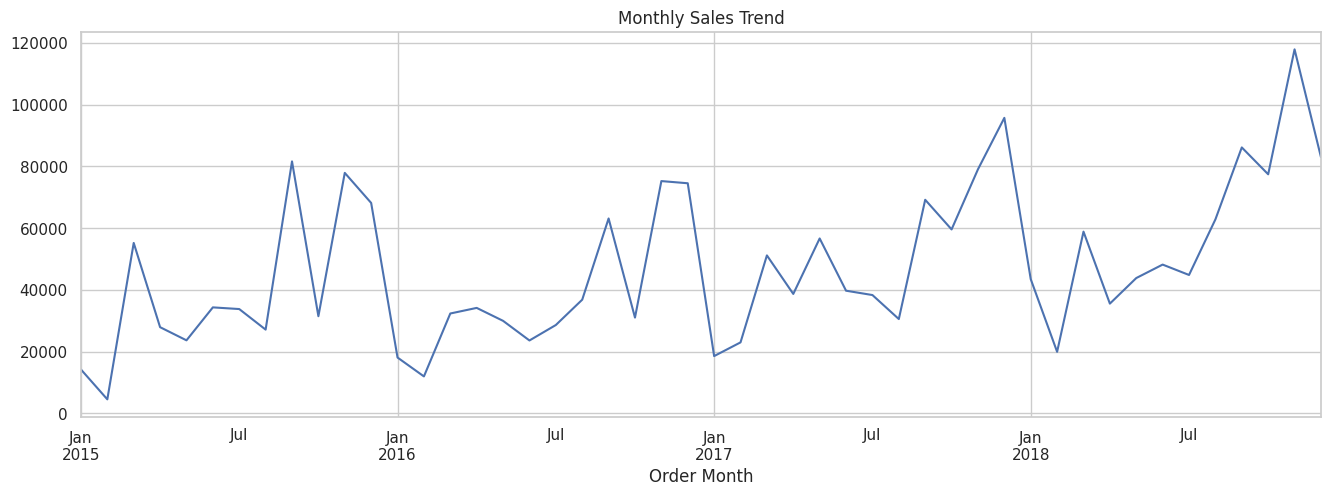

In [15]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.show()


In [16]:
print("average shipping duration")
df['Shipping Duration'].mean()


average shipping duration


3.9611224489795918

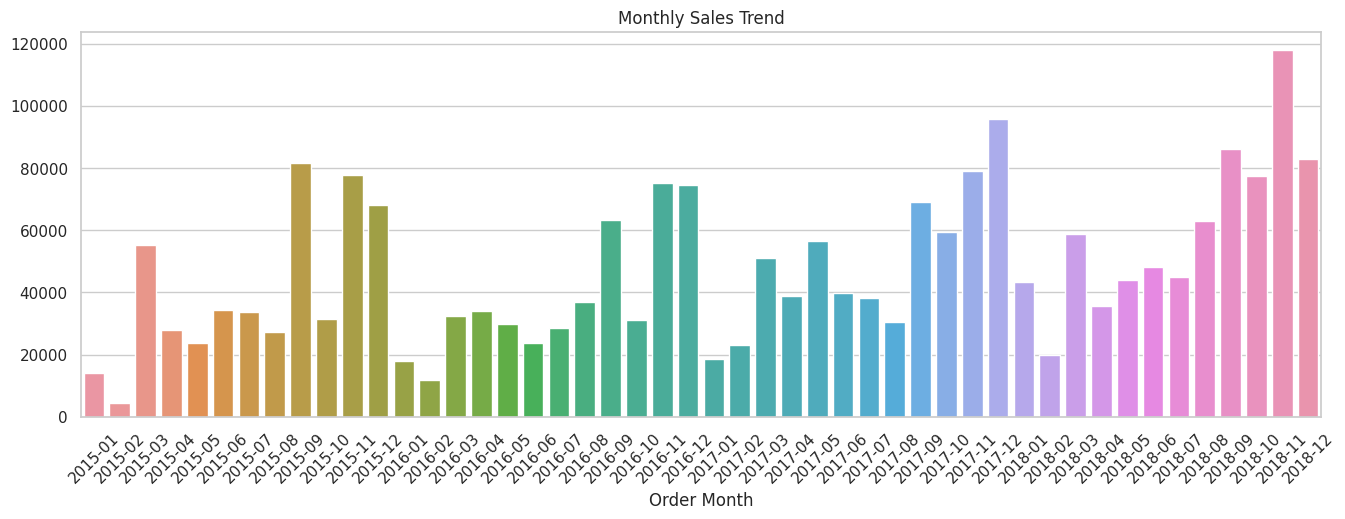

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


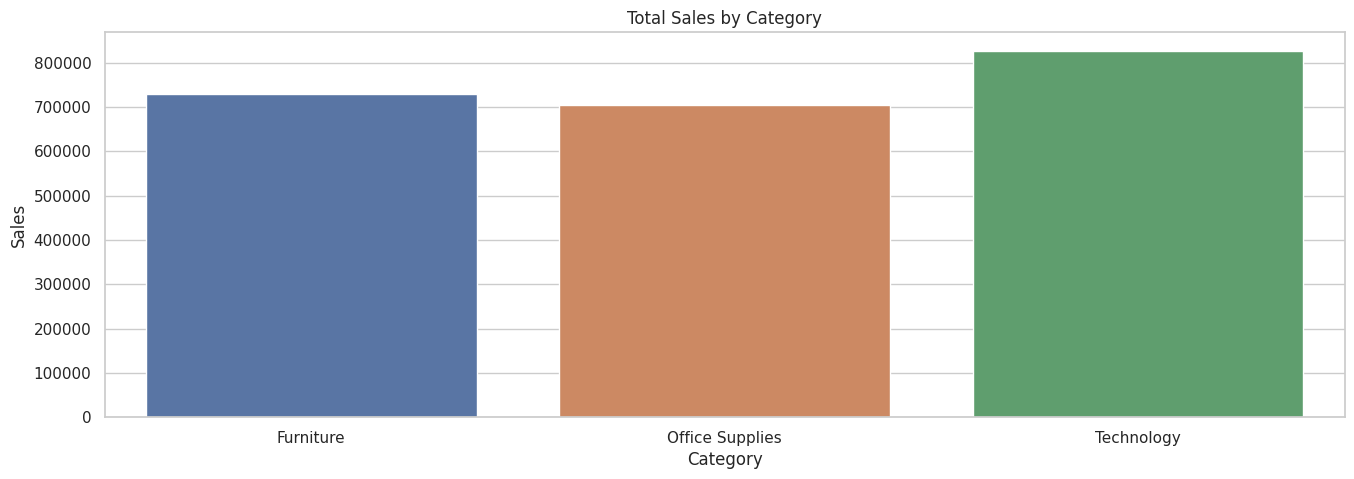

In [18]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
sns.barplot(data=category_sales, x='Category', y='Sales')
plt.title("Total Sales by Category")
plt.show()


In [19]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Shipping Duration',
       'Order Month'],
      dtype='object')

In [20]:
df['Estimated_Cost'] = df['Sales'] * 0.75  # assuming 25% profit margin
df['Profit'] = df['Sales'] - df['Estimated_Cost']


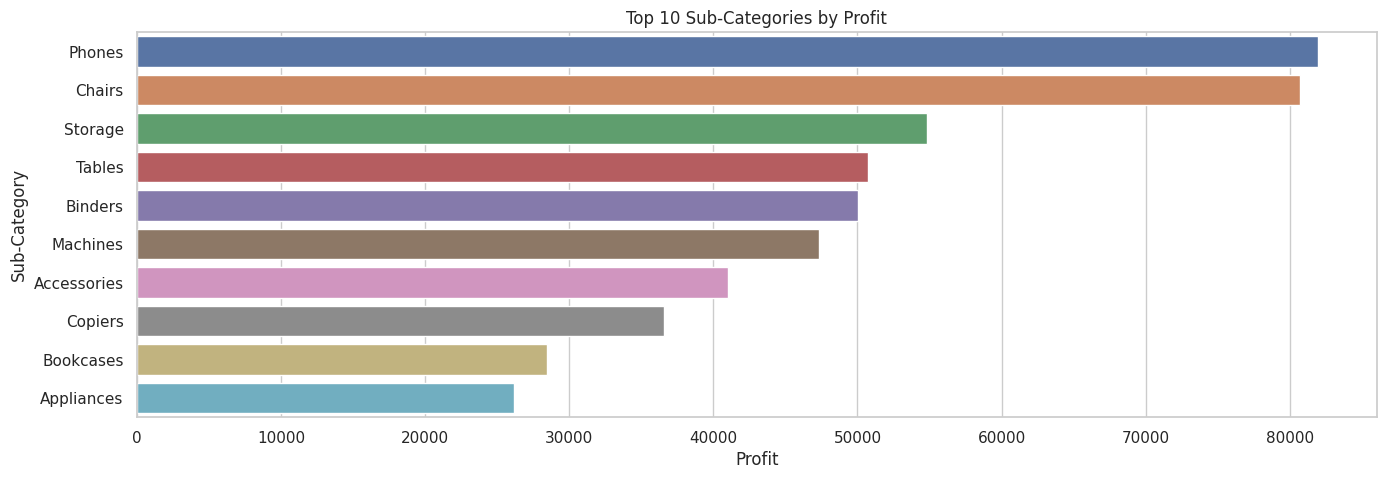

In [21]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=subcat_profit, x='Profit', y='Sub-Category')
plt.title("Top 10 Sub-Categories by Profit")
plt.show()


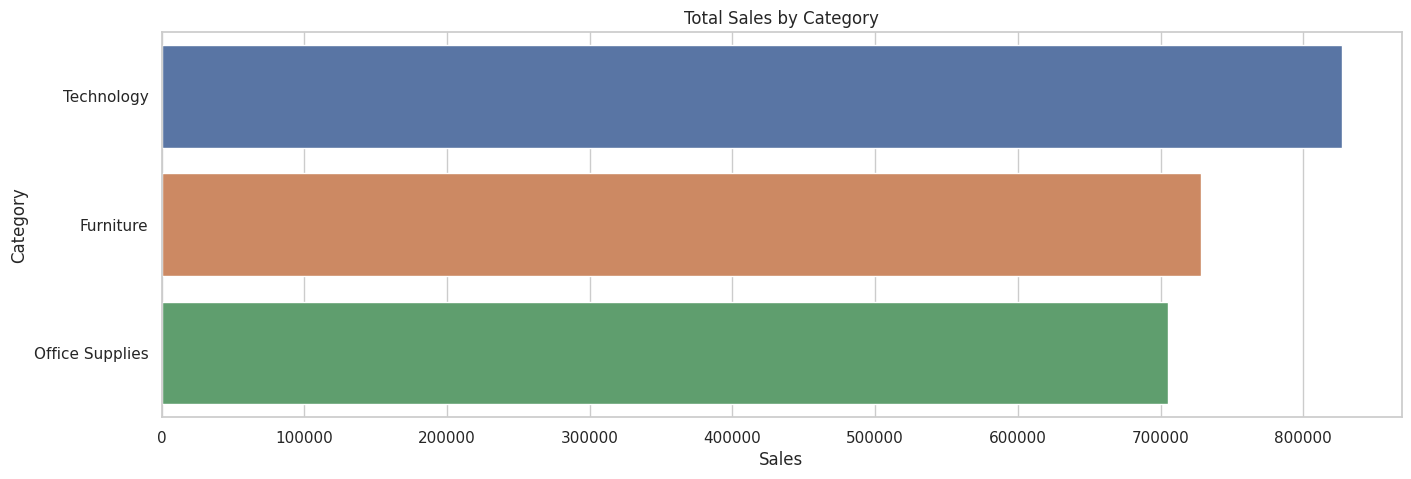

In [22]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=category_sales, x='Sales', y='Category')
plt.title("Total Sales by Category")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


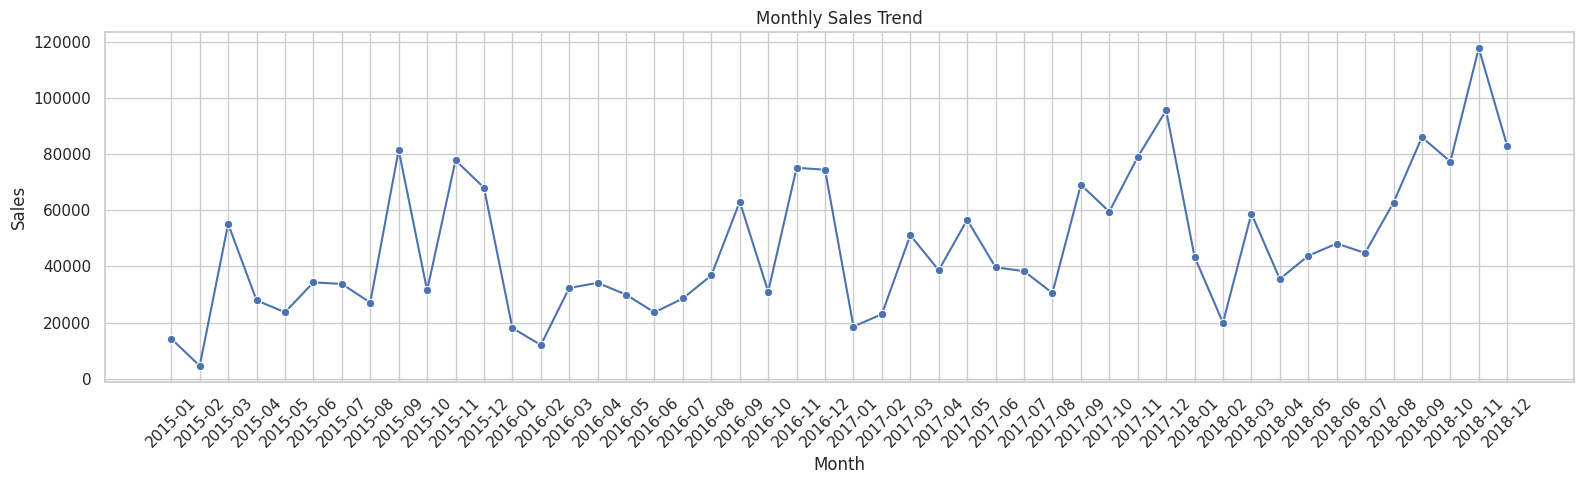

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Already done earlier
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


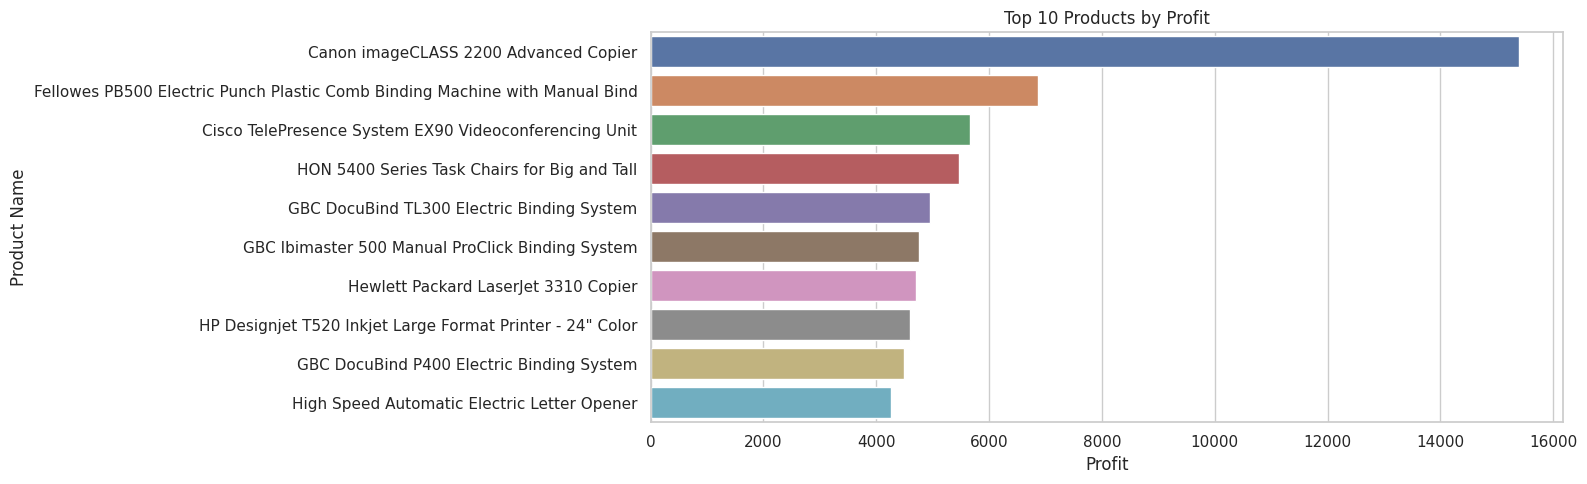

In [24]:
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=product_profit, x='Profit', y='Product Name')
plt.title("Top 10 Products by Profit")
plt.tight_layout()
plt.show()



In [27]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Shipping Duration',
       'Order Month', 'Estimated_Cost', 'Profit', 'Month'],
      dtype='object')

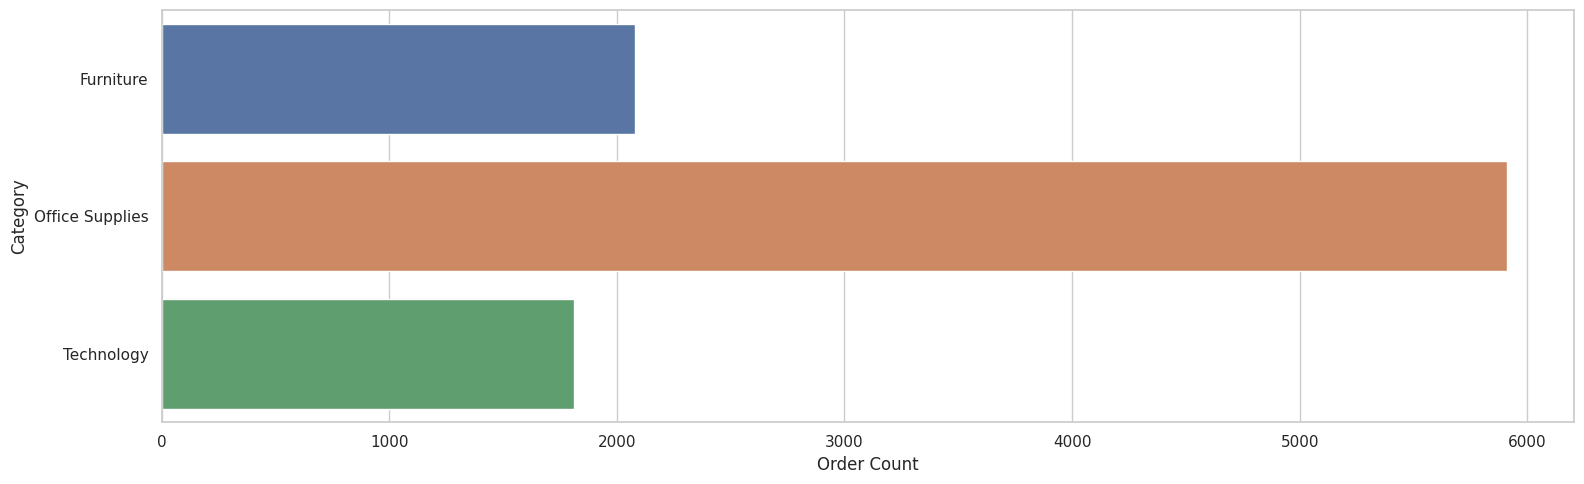

In [32]:
# sns.barplot(data=df['Category'])
# the above line of code returns an error as we need a count plot ]
sns.countplot(data=df,y='Category')
plt.xlabel("Order Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()